In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
pcif = Path() / 'cifar10'
pa = pcif / 'weights.npy'

In [3]:
data = np.load(pa)

In [4]:
len(data)*data[0].shape[0]

1341900000

In [14]:
df = pd.read_csv( pcif / 'layout.csv')
df

,varname,start_idx,end_idx,size,shape
0,sequential/conv2d/bias:0,0,16,16,"(16,)"
1,sequential/conv2d/kernel:0,16,160,144,"(3, 3, 1, 16)"
2,sequential/conv2d_1/bias:0,160,176,16,"(16,)"
3,sequential/conv2d_1/kernel:0,176,2480,2304,"(3, 3, 16, 16)"
4,sequential/conv2d_2/bias:0,2480,2496,16,"(16,)"
5,sequential/conv2d_2/kernel:0,2496,4800,2304,"(3, 3, 16, 16)"
6,sequential/dense/bias:0,4800,4810,10,"(10,)"
7,sequential/dense/kernel:0,4810,4970,160,"(16, 10)"


In [6]:
m = pd.read_csv( pcif / 'metrics.csv.gz')

In [18]:
[sh for sh in df['shape']], 3*3*1*16, 3*3*16*16, 16*10

(['(16,)',
  '(3, 3, 1, 16)',
  '(16,)',
  '(3, 3, 16, 16)',
  '(16,)',
  '(3, 3, 16, 16)',
  '(10,)',
  '(16, 10)'],
 144,
 2304,
 160)

array([[<AxesSubplot:title={'center':'test_accuracy'}>]], dtype=object)

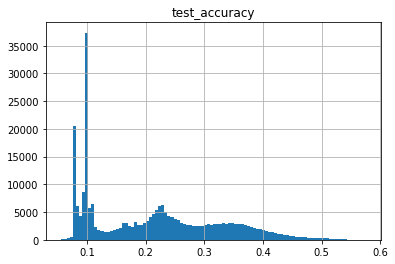

In [8]:
m.hist(column='test_accuracy', bins=100)

In [13]:
n = len(data)
n

270000

In [12]:
zoo = pcif / 'dgms'
zoo.mkdir()

In [30]:
df_sel = df[
    (df['varname'].str.contains('conv2d') 
     | df['varname'].str.contains('dense')) 
    & df['varname'].str.contains('kernel') ]
df_sel

,varname,start_idx,end_idx,size,shape
1,sequential/conv2d/kernel:0,16,160,144,"(3, 3, 1, 16)"
3,sequential/conv2d_1/kernel:0,176,2480,2304,"(3, 3, 16, 16)"
5,sequential/conv2d_2/kernel:0,2496,4800,2304,"(3, 3, 16, 16)"
7,sequential/dense/kernel:0,4810,4970,160,"(16, 10)"


In [35]:
layers_ixs = list(zip(df_sel['start_idx'], df_sel['end_idx']))
layers_ixs

[(16, 160), (176, 2480), (2496, 4800), (4810, 4970)]

In [36]:
import persian.filtration as pf

In [38]:
for i in range(n):
    if i%10 == 0:
        print(f'processing {i}/{n-1}',
              zoo / f'{cifar}_dgms.npz',
              sep='\t')
    n_samples = 144
    count = 1
    np.random.seed(94)
    clouds = [
        np.array([data[i][b:e][np.random.permutation(e-b)][:n_samples]
                  for b, e in layers_ixs]).T
        for _ in range(count)
    ]

    dgms = pf.persistet_diagram(clouds, n_jobs=-1)
    save_diagrams(zoo / f'dgm_{i}.npz', dgms)

NameError: name 'cifar' is not defined